# Four dimensional images

Outside our three-dimensional comfort zone.

Images can also be four-dimensional. It’s easiest to think of four dimensional images as a stack of 3-dimensional images (volumes).

Here we load a four dimensional image. It is an functional MRI image, where the volumes are collected in sequence a few seconds apart.

In [1]:
import nibabel as nib

In [2]:
img = nib.load('ds114_sub009_t2r1.nii')
data = img.get_data()

The image we have just loaded is a four-dimensional image, with a four-dimensional array:

In [3]:
data.shape

(64, 64, 30, 173)

The first three axes represent three dimensional space. The last axis represents time. Here the last (time) axis has length 173. This means that, for each of these 173 elements, there is one whole three dimensional image. We often call the three-dimensional images volumes. So we could say that this 4D image contains 173 volumes.

We have previously been taking slices over the third axis of a three-dimensional image. We can now take slices over the fourth axis of this four-dimensional image:

In [4]:
first_vol = data[:, :, :, 0]  # A slice over the final (time) axis

This slice selects the first three-dimensional volume (3D image) from the 4D array:

In [5]:
first_vol.shape

(64, 64, 30)

`first_vol` is a 3D image just like the 3D images you have already seen:

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

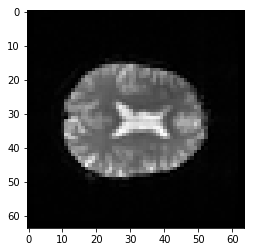

In [7]:
# A slice over the third dimension of a 3D image
plt.imshow(first_vol[:, :, 14])

We can now start to look at how the signal changes over time.  To begin, we do something very simple, which is to take the mean of all the voxel values in each 3D scan:

In [8]:
means = []
n_vols = data.shape[-1]  # The length of the last axis
for i in range(n_vols):
    this_vol = data[:, :, :, i]
    mean = np.mean(this_vol)  # Mean across all voxels
    means.append(mean)

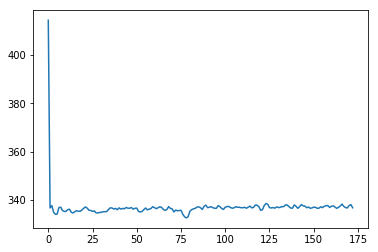

In [9]:
plt.plot(means)

Ouch - the first scan has a much higher mean than the others.  Why?

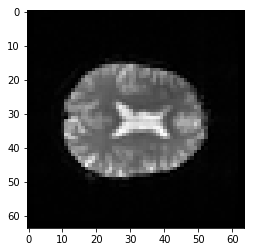

In [10]:
plt.imshow(first_vol[:, :, 14])

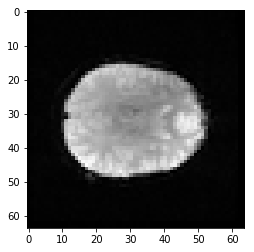

In [11]:
second_vol = data[:, :, :, 1]
plt.imshow(second_vol[:, :, 14])

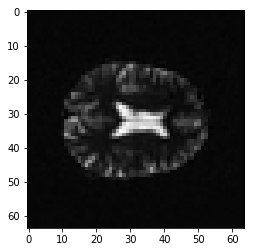

In [12]:
vol_diff = first_vol - second_vol
plt.imshow(vol_diff[:, :, 14])